# Cats vs Dogs pretrained feature extraction CNN

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# # se this piece of code to download kaggle data directly to colab
# upload kaggle json file on the colab
from google.colab import files
files.upload()
# make kaggle directory
!mkdir ~/.kaggle
# move kaggle file to newly created folder
!cp kaggle.json ~/.kaggle/
# chnage permissions for file created
!chmod 600 ~/.kaggle/kaggle.json
# Downlaod data from kaggle
!kaggle competitions download -c dogs-vs-cats

# unzip downloaded data
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

# Copying images to training, validation, and test directories
# imports
import os, shutil, pathlib
# path to complete data set 
original_dir = pathlib.Path("train")
# path to smaller data set
new_base_dir = pathlib.Path("cats_vs_dogs_small")
# function to get images from complete set and save in subset
def make_subset(subset_name, start_index, end_index):
  # loop over cat and dog category
  for category in ("cat", "dog"):
    # path to new directory
    dir = new_base_dir / subset_name / category
    # make new directories
    os.makedirs(dir)
    # range of files names
    fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
    for fname in fnames:
      # copy files from source to target
      shutil.copyfile(src=original_dir / fname, dst=dir / fname)
# call sfor train, validation and test set
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

# Using image_dataset_from_directory to read images
  # image_dataset_from_directory(directory) will list the subdirectories of directory
  # index the image files in each subdirectory
  # create and return a tf.data.Dataset object 
    # configured to read these files, 
    # shuffle them
    # decode them to tensors
    # resize them to a shared size
    # and pack them into batches.

from tensorflow.keras.utils import image_dataset_from_directory
 
# create datasets
train_dataset = image_dataset_from_directory(
    # path of the directory
    new_base_dir / "train",
    # reshape images to said size
    image_size=(180, 180),
    # batch size / 32 samples per batch
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

# Displaying the shapes of the data and labels yielded by the Dataset
for i, element in enumerate(train_dataset):
  pass
print("bathces of train_dataset : ",i)
for train_data_batch, train_labels_batch in train_dataset:
  print("train data batch shape:", train_data_batch.shape)
  print("train labels batch shape:", train_labels_batch.shape)
  break
for i, element in enumerate(validation_dataset):
  pass
print("bathces of validation_dataset : ",i)
for validation_data_batch, validation_labels_batch in validation_dataset:
  print("validation data batch shape:", validation_data_batch.shape)
  print("validation labels batch shape:", validation_labels_batch.shape)
  break
for i, element in enumerate(test_dataset):
  pass
print("bathces of test_dataset : ",i)
for test_data_batch, test_labels_batch in test_dataset:
  print("test data batch shape:", test_data_batch.shape)
  print("test labels batch shape:", test_labels_batch.shape)
  break

Mounted at /content/drive


Saving kaggle.json to kaggle.json
 99% 806M/812M [00:03<00:00, 211MB/s]
100% 812M/812M [00:03<00:00, 246MB/s]
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
bathces of train_dataset :  62
train data batch shape: (32, 180, 180, 3)
train labels batch shape: (32,)
bathces of validation_dataset :  31
validation data batch shape: (32, 180, 180, 3)
validation labels batch shape: (32,)
bathces of test_dataset :  62
test data batch shape: (32, 180, 180, 3)
test labels batch shape: (32,)


In [2]:
from tensorflow import keras 

# Listing 8.19 Instantiating the VGG16 convolutional base
conv_base = keras.applications.vgg16.VGG16(
    # weights specifies the weight checkpoint from which to initialize the model.
    weights="imagenet",
    # include_top refers to including (or not) the densely connected classifier on top of the network
      # By default, this densely connected classifier corresponds to the 1,000 classes from ImageNet.
      # Because we intend to use our own densely connected classifier, 
      # we don’t need to include it.
    include_top=False,
    # input_shape is the shape of the image tensors that
      # we’ll feed to the network. This argument is purely optional: 
      # if we don’t pass it, the network will be able to process inputs of any size. 
      # Here we pass it so that we can visualize (in the following summary) 
      # how the size of the feature maps shrinks with each new convolution and pooling layer.
    input_shape=(180, 180, 3))


58900480/58889256 [==============================] - 0s 0us/step


In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [4]:
# Listing 8.20 Extracting the VGG16 features and corresponding labels
import numpy as np
 
def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)
 
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)
print("train features Shape :",train_features.shape)
print("train labels Shape :",train_labels.shape)
print("val features Shape :",val_features.shape)
print("val labels Shape :",val_labels.shape)
print("test features Shape :",test_features.shape)
print("test labels Shape :",test_labels.shape)


train features Shape : (2000, 5, 5, 512)
train labels Shape : (2000,)
val features Shape : (1000, 5, 5, 512)
val labels Shape : (1000,)
test features Shape : (2000, 5, 5, 512)
test labels Shape : (2000,)


In [5]:
from tensorflow.keras import layers

# Listing 8.21 Defining and training the densely connected classifier
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])
 
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="cats_vs_dogs_small_feature_extraction.keras",
    save_best_only=True,
    monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)


Epoch 1/20
63/63 [==============================] - 3s 14ms/step - loss: 19.2520 - accuracy: 0.9195 - val_loss: 4.6606 - val_accuracy: 0.9720
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 3.9853 - accuracy: 0.9785 - val_loss: 4.4744 - val_accuracy: 0.9680
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 2.0467 - accuracy: 0.9860 - val_loss: 5.7875 - val_accuracy: 0.9710
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 1.7224 - accuracy: 0.9865 - val_loss: 5.8630 - val_accuracy: 0.9730
Epoch 5/20
63/63 [==============================] - 1s 12ms/step - loss: 1.1257 - accuracy: 0.9920 - val_loss: 6.6407 - val_accuracy: 0.9750
Epoch 6/20
63/63 [==============================] - 1s 15ms/step - loss: 0.4922 - accuracy: 0.9955 - val_loss: 8.4395 - val_accuracy: 0.9630
Epoch 7/20
63/63 [==============================] - 1s 12ms/step - loss: 0.4947 - accuracy: 0.9960 - val_loss: 7.2955 - val_accuracy: 0.9680
Epoch 8/20
63

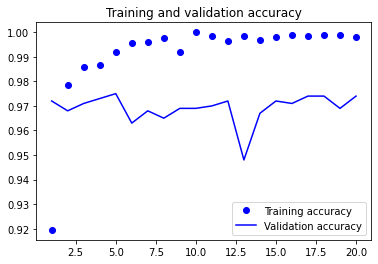

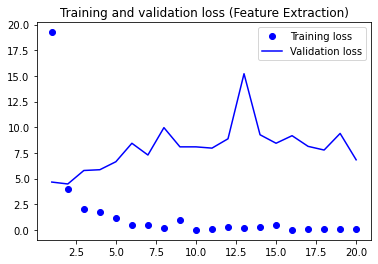

In [6]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy (Feature Extraction)")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss (Feature Extraction)")
plt.legend()
plt.show()

In [7]:
# Listing 8.26 Evaluating the model on the test set
test_model = keras.models.load_model("cats_vs_dogs_small_feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 0s 4ms/step - loss: 5.2588 - accuracy: 0.9710
Test accuracy: 0.971
